In [1]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<span style="color:red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

Continuing with the same dataset as past notebooks, I will be looking at a collection of tweets that went viral during the 2016 election. Within this collection, a few tweets were identified as containing fake news. This notebook will analyze the text of these tweets using Word2vec, as a way to explore the semantic space.

In [2]:
# Preprocessing for word2vec analysis
tweetsDF = pd.read_excel("/home/rkcatipon/Content-Analysis-2020/week-5/electionday_tweets.xlsx")

#load data

tweetsDF['tokenized_sents'] = tweetsDF['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
tweetsDF['normalized_sents'] = tweetsDF['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

tweetsDF[:100:10]


,is_fake_news,fake_news_category,tweet_id,created_at,retweet_count,text,user_screen_name,user_verified,user_friends_count,user_followers_count,user_favourites_count,tweet_source,geo_coordinates,num_hashtags,num_mentions,num_urls,num_media,tokenized_sents,normalized_sents
0,False,NaN,264033382076407808,Thu Nov 01 15:57:18 +0000 2012,4698,@realDonaldTrump you are full of shit!,RalphGilles,True,763,26680,3079,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[@realDonaldTrump, you, are, full, of, shit]]","[[@realdonaldtrump, shit]]"
10,False,NaN,388618880605646848,Fri Oct 11 10:55:36 +0000 2013,1629,Beautiful morning walk in Hyde Park #London wi...,billclinton,True,26,6252982,60,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1,1,2,0,1,"[[Beautiful, morning, walk, in, Hyde, Park, Lo...","[[beautiful, morning, walk, hyde, park, london..."
20,False,NaN,596194588064354304,Thu May 07 06:07:21 +0000 2015,3522,There's an important choice to be made today; ...,SoVeryBritish,True,1,1441390,1468,"<a href=""http://twitter.com/download/iphone"" r...",0,0,1,0,0,"[[There, 's, an, important, choice, to, be, ma...","[[important, choice, today, vote, wisely, favo..."
30,False,NaN,658662473231298560,Mon Oct 26 15:12:25 +0000 2015,16504,Hey @realDonaldTrump you saw a kid lost in New...,DaveWeasel,True,134460,221619,29437,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[Hey, @realDonaldTrump, you, saw, a, kid, los...","[[hey, @realdonaldtrump, saw, kid, lost, new, ..."
40,False,NaN,674008204838199297,Mon Dec 07 23:30:53 +0000 2015,8749,Finally trashed by @realDonaldTrump. Will stil...,JeffBezos,True,0,146602,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1,1,2,0,0,"[[Finally, trashed, by, @realDonaldTrump], [Wi...","[[finally, trashed, @realdonaldtrump], [reserv..."
50,False,NaN,687317650658189312,Wed Jan 13 16:57:52 +0000 2016,18193,'To Bernie Sanders with thanks for your commit...,BernieSanders,True,1511,3866551,970,"<a href=""https://about.twitter.com/products/tw...",0,0,2,0,0,"[[To, Bernie, Sanders, with, thanks, for, your...","[[bernie, sanders, thanks, commitment, real, h..."
60,False,NaN,693175853853904898,Fri Jan 29 20:56:16 +0000 2016,4419,"Oh, yeah btw I still have a copy of this tweet...",QU0RN_D0G,False,4854,7664,14830,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,2,0,1,"[[Oh], [yeah], [btw, I, still, have, a, copy, ...","[[oh], [yeah], [btw, copy, tweet, deleted, sir..."
70,False,NaN,704756959019474948,Tue Mar 01 19:55:27 +0000 2016,7867,"@realDonaldTrump, Bless your heart.",nikkihaley,True,176,158430,138,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,2,0,0,"[[@realDonaldTrump, Bless, your, heart]]","[[@realdonaldtrump, bless, heart]]"
80,False,NaN,712380720656883713,Tue Mar 22 20:49:33 +0000 2016,2744,Retweet if Donald J. Trump has your vote for t...,trump_nation,False,778,28272,676,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[Retweet, if, Donald, J., Trump, has, your, v...","[[retweet, donald, j., trump, vote, general, e..."
90,False,NaN,722628702748688385,Wed Apr 20 03:31:23 +0000 2016,5363,'@bigop1: @realDonaldTrump @CNN @oreillyfactor...,realDonaldTrump,True,41,13035771,45,"<a href=""http://twitter.com/download/android"" ...",0,0,5,0,1,"[[@bigop1], [@realDonaldTrump, @CNN, @oreillyf...","[[@bigop1], [@realdonaldtrump, @cnn, @oreillyf..."


In [3]:
#The tokenized text is now in lists of lists

,is_fake_news,fake_news_category,tweet_id,created_at,retweet_count,text,user_screen_name,user_verified,user_friends_count,user_followers_count,user_favourites_count,tweet_source,geo_coordinates,num_hashtags,num_mentions,num_urls,num_media,tokenized_sents,normalized_sents
0,False,NaN,264033382076407808,Thu Nov 01 15:57:18 +0000 2012,4698,@realDonaldTrump you are full of shit!,RalphGilles,True,763,26680,3079,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[@realDonaldTrump, you, are, full, of, shit]]","[[@realdonaldtrump, shit]]"


In [4]:
# train the word2vec model with sentences

tweetsW2V = gensim.models.word2vec.Word2Vec(tweetsDF['normalized_sents'].sum())

In [5]:
# let us inspect the term Trump
tweetsW2V['trump'][:10]

array([ 0.01289606, -0.00041388, -0.01366387, -0.0157923 ,  0.01326016,
        0.01739379, -0.01310362,  0.01145159,  0.00240094, -0.00805926],
      dtype=float32)

In [16]:
# a look at all the vectors
print(tweetsW2V.wv.syn0)
print()
print("A look at the different vectorized words")
print("##########")
print('11:', tweetsW2V.wv.index2word[11])
print('200:', tweetsW2V.wv.index2word[200])
print('90:', tweetsW2V.wv.index2word[90])

[[ 0.0154112   0.00153469 -0.01682547 ... -0.01832273 -0.01056829
  -0.00050319]
 [ 0.00707332  0.00132964 -0.00175251 ... -0.00370144 -0.00423952
  -0.00156042]
 [ 0.00856132  0.00260492 -0.01599956 ... -0.0170201  -0.0106805
  -0.00083043]
 ...
 [ 0.00549344  0.00379087 -0.00075946 ...  0.00032598  0.00145225
   0.00126699]
 [ 0.00262748 -0.00432705 -0.00460185 ... -0.0027735   0.00074744
  -0.00358284]
 [ 0.00108969  0.00414724 -0.00546189 ...  0.00412179  0.00106543
  -0.00088897]]

A look at the different vectorized words
##########
11: president
200: political
90: good


# Cosine similarity
Because of the nature of the dataset, I would like to learn about words that are most similar to the two candidates according to w2v. I hypothesize that the words that are considered similar to the Clinton and Trump may tell us about the characterization of the two candidates the day of the election.

In [18]:
tweetsW2V.most_similar('trump')

[('@realdonaldtrump', 0.9343799948692322),
 ('@hillaryclinton', 0.9262780547142029),
 ('america', 0.9177895784378052),
 ('amp', 0.902174711227417),
 ('vote', 0.894525408744812),
 ('american', 0.8825736045837402),
 ('country', 0.8721880912780762),
 ('big', 0.8711351156234741),
 ('stop', 0.864741861820221),
 ('day', 0.8636565208435059)]

In [42]:
tweetsW2V.most_similar('clinton')

[('@hillaryclinton', 0.8727900981903076),
 ('@realdonaldtrump', 0.8681909441947937),
 ('country', 0.8492379188537598),
 ('america', 0.8481353521347046),
 ('trump', 0.8440330028533936),
 ('people', 0.8304079174995422),
 ('amp', 0.8279247879981995),
 ('american', 0.8269222974777222),
 ('today', 0.8174984455108643),
 ('fight', 0.8165656328201294)]

In [43]:
tweetsW2V.most_similar('@hillaryclinton')

[('@realdonaldtrump', 0.958302915096283),
 ('trump', 0.9262779951095581),
 ('amp', 0.9144220352172852),
 ('vote', 0.9132774472236633),
 ('country', 0.9084826111793518),
 ('american', 0.9036430716514587),
 ('america', 0.9011461138725281),
 ('people', 0.8889366388320923),
 ('polls', 0.8847053050994873),
 ('fight', 0.8837143182754517)]

It makes that in the vector space the two candidate profiles would be close together. Semantically, it also appears they have cosine similar features such as "American" and "country". The two divergent terms are "big" for Trump and "fight" for Clinto which only appear in their respective candidate's cosine similarity set.

In [23]:
tweetsW2V.doesnt_match(['fight', 'clinton', 'today', 'huge', 'country'])

'huge'

Seems like "huge" is not like the others in the wordset. Let us take a look at the semantic equation. In the readings, the go-to example of word2vec is King + woman - man = queen. I'd be curious to see how word2vec handles two political spectrums represented by @hillaryclinton versus @realdonaltrump. Let's talk a look at how @HillaryClinton subtracts "emails" and adds "huge".

# W2V subtraction and addition

In [47]:
tweetsW2V.most_similar(positive=['@hillaryclinton', 'huge'], negative = ['emails'])

[('@realdonaldtrump', 0.5528126955032349),
 ('cast', 0.542144775390625),
 ('time', 0.5393102765083313),
 ('😂', 0.5389424562454224),
 ('people', 0.5258145332336426),
 ('day', 0.5058679580688477),
 ('.@hillaryclinton', 0.5038829445838928),
 ('voter', 0.5028741359710693),
 ('vote', 0.49897879362106323),
 ('going', 0.49754953384399414)]

In this word set, Clinton + huge - emails = @realdonaldtrump. Clinton is to emails and realdonaldtrump is to huge. These were buzzwords associated with both campaigns (for better or for worse). This intuitively makes sense but this does not seem to be a "hard" analysis, but rather is open to interpretation when dealing with such similar texts.

In [48]:
# save
tweetsW2V.save("tweetsW2V")

# Visualization

Visualizing top words and their vectors

In [49]:
# visualize by taking top words
numWords = 50
targetWords = tweetsW2V.wv.index2word[:numWords]

# extract top word vectors.
# create smaller matrix preserves distances from orig. matrix
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(tweetsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix


#PCA reduction to number of words = number of components
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

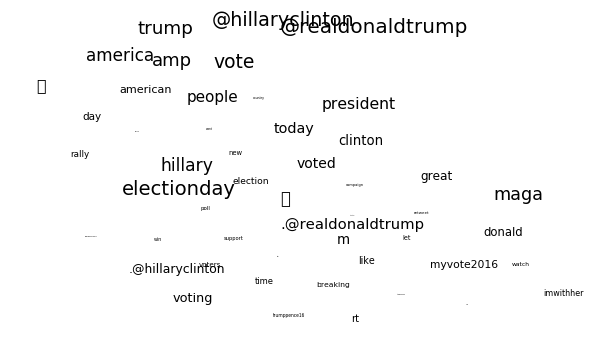

In [50]:
#plot the points

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Cool! I think the [] are emojis that may not translate in the visualization. We do see that #myvote2016 is close to "#realdonaldtrump", "donald", and "maga". It also seems that Clinton's campaign hashtag #imwithher is close to the hashtag #myvote2016 as well, though it's surprisingly not close to "hillary" and "@hillaryclinton". I would venture a guess at user behavior here: perhaps users were tagging the campaign but were mostly talking about Trump directly. 

# Stretch

<span style="color:red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [ ]:
x = tweetsW2V.most_similar(positive=['@hillaryclinton', 'huge'], negative = ['emails'])
y = tweetsW2V.most_similar(positive=['@realdonaldtrump', 'big'], negative = ['huge'])

x = np.asarray(x).reshape(-1,1)
y = np.asarray(y).reshape(-1,1)
x.dot(y)

# I tried running this but multiplication did not work


## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

XX Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [1]:
import re
import zipfile
import os
import sys

In [4]:
corpus_name = "NOW"

def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

In [5]:
news_raw = loadcorpus(corpus_name)

text-16-11.zip


In [18]:
import pickle
pickle.dump( news_raw, open( "news_raw.p", "wb" ) )

In [19]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [59]:
zfile = zipfile.ZipFile(corpus_name + "/sources-16-11.zip")
source = []

In [60]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [20]:
news_texts = {}
just_texts = {}
for files in news_raw :
    news = clean_raw_text(news_raw[files][1:])
    for article in news:
        txts = lucem_illud_2020.word_tokenize(article)
        try:
            news_texts[txts[0][2:]] = txts[1:]
            just_texts[txts[0][2:]] = article
        except IndexError:
            continue
            

In [21]:
pickle.dump( news_texts, open( "news_texts.p", "wb" ) )
pickle.dump( just_texts, open( "just_texts.p", "wb" ) )

In [ ]:
news_texts.keys()

In [61]:
news_df = pd.DataFrame(columns=["title", "date", "country", "source", "url", "text", "tokenized texts"])

In [62]:
source[3:4]

[b"15155518\t132\t16-11-01\tUS\tBusiness Wire (press release)\thttp://www.businesswire.com/news/home/20161101005831/en/Assessment-Chinas-Market-Control-Valves-2015-2020--\tAssessment of China's Market for Control Valves 2015-2020 ...\r\n"]

In [ ]:
# I used the following code to extract articles and create my df 

for news in source[3:]:
    try:
        tid, total_words, date, country, source, url, title = news.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    try:
        news_df[tid.strip()] = [title.strip(), date.strip(), country.strip(), source.strip(), url.strip(), just_texts[tid.strip()], news_texts[tid.strip()]]
    except KeyError:
        continue

In [67]:
news_df = news_df.T

In [68]:
news_df.shape

(131965, 7)

In [74]:
news_df = news_df.rename(columns={0: 'title', 1: 'date', 2:'country', 3:'source', 4:'url', 5:'text', 6:'tokenized_text'})

In [79]:
news_df = news_df.iloc[7:]

In [81]:
news_df.to_csv('news_df.csv')

# Doc2Vec

In [611]:
news_df = pd.read_csv("news_df.csv")

In [621]:
#bhargav recommended going small
news_df_tiny = news_df[:50]
news_df_tiny[35:40]

,Unnamed: 0,title,date,country,source,url,text,tokenized_text
35,15166791,Health department confirms first case of the f...,16-11-01,US,FOX31 Denver,http://kdvr.com/2016/11/01/pueblo-county-repor...,@@15166791 <h> Health department confirms firs...,"['<', 'h', '>', 'Health', 'department', 'confi..."
36,15167590,Exploring future ways voting could be tweaked,16-11-01,US,21Alive,http://www.21alive.com/video/Exploring-future-...,@@15167590 <h> Exploring future ways voting co...,"['<', 'h', '>', 'Exploring', 'future', 'ways',..."
37,15169138,"Marvel's Agents of SHIELD: ""The Good Samaritan...",16-11-01,US,IGN,http://www.ign.com/articles/2016/11/02/marvels...,"@@15169138 <h> Marvel's Agents of SHIELD : "" T...","['<', 'h', '>', 'Marvel', ""'s"", 'Agents', 'of'..."
38,15152845,Obama in Ohio to kick off week of campaigning ...,16-11-01,US,The Telegraph,http://www.macon.com/news/nation-world/article...,@@15152845 <h> Obama in Ohio to kick off week ...,"['<', 'h', '>', 'Obama', 'in', 'Ohio', 'to', '..."
39,15152897,Confidante of South Korea's President Detained...,16-11-01,US,TIME,http://time.com/4552745/choi-soon-sil-park-geu...,@@15152897 <h> Confidante of South Korea's Pre...,"['<', 'h', '>', 'Confidante', 'of', 'South', '..."


In [623]:
# preprocessing

#news_df_small['tokenized_words'] = news_df_small['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
news_df_tiny['normalized_words'] = news_df_tiny['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x, lemma=False))

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [624]:
news_df_tiny.columns

Index(['Unnamed: 0', 'title', 'date', 'country', 'source', 'url', 'text',
       'tokenized_text', 'normalized_words'],
      dtype='object')

In [630]:
keywords = ['obama', 'clinton', 'trump']
taggedDocs = []
for index, row in news_df_tiny.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['date'])
    docKeywords.append(row['Unnamed: 0']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'],
                                                            tags = docKeywords))

news_df_tiny['TaggedArticles'] = taggedDocs

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
newsD2V = gensim.models.doc2vec.Doc2Vec(news_df_tiny['TaggedArticles'], vector_size = 100)

In [629]:
news_df_tiny['TaggedDocs'][:5]

0    ([<, p, >, market, study, defined, domestic, s...
1    ([<, h, >, november, begins, surge, warmer, we...
2    ([<, p, >, judea, military, court, recently, o...
3    ([<, p, >, fitbit, inc, nyse, fit, went, lower...
4    ([<, p, >, entitled, rich, people, think, gosh...
Name: TaggedDocs, dtype: object

In [ ]:
# save
newsD2V.save('newsD2V')

In [ ]:
# load
#newsD2V = gensim.models.word2vec.Word2Vec.load('data/newsD2V')

In [ ]:
# inspect vectors
newsD2V.docvecs[1]

In [ ]:
# inspect a word
newsD2V['election']

In [ ]:
# inspect a word vecor
newsD2V.most_similar(positive = ['clinton','democrat'], negative = ['trump'], topn = 1)

In [ ]:
# compute all of these by hand--explicitly wth vector algebra:
sklearn.metrics.pairwise.cosine_similarity(newsD2V['clinton'].reshape(1,-1), newsD2V['trump'].reshape(1,-1))


In [ ]:
# calculate distance between a word and documents in the dataset
newsD2V.docvecs.most_similar([ newsD2V['trump'] ], topn=5 )

In [ ]:
# words most similar to the document
newsD2V.most_similar( [ newsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5) 


In [ ]:
#query composed of multiple words
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

In [ ]:
#heatmap
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

In [ ]:
#plot heatmap
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [ ]:

targetDocs = apsDF['title'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<span style="color:red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [43]:
#load data
news_df_small = news_df[:500]

#structure
news_df_small['tokenized_sents'] = news_df_small['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
news_df_small['normalized_sents'] = news_df_small['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

#generate
newsW2V = gensim.models.word2vec.Word2Vec(news_df_small['normalized_sents'].sum())


/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#from gensim.test.utils import get_tmpfile
#fname = get_tmpfile("vectors.kv")
#news_vecs.save(fname)
#news_vecs = gensim.models.KeyedVectors.load(fname, mmap='r')

In [272]:
#nytimes_model = gensim.models.KeyedVectors.load_word2vec_format()


#words to create dimensions
newsTargetWords = ['clinton', 'trump', 'election', 'meddling', 'vote', 'campaign', 'republican', 'democrat', 'immigrant','healthcare', 'conservative', 'liberal']
#words we will be mapping
newsTargetWords += ['president', 'election', 'emails', 'border', 'security', 'democracy', 'partisan', 'legal', 'illegal', 'taxes', 'leaks']


wordsSubMatrix = []
for word in newsTargetWords:
    wordsSubMatrix.append(newsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix


In [273]:
wordsSubMatrix.shape

(23, 100)

In [274]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [275]:
pcaWordsNews = sklearn.decomposition.PCA(n_components = 18).fit(wordsSubMatrix)
reducedPCA_dataNews = pcaWordsNews.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNews = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNews)

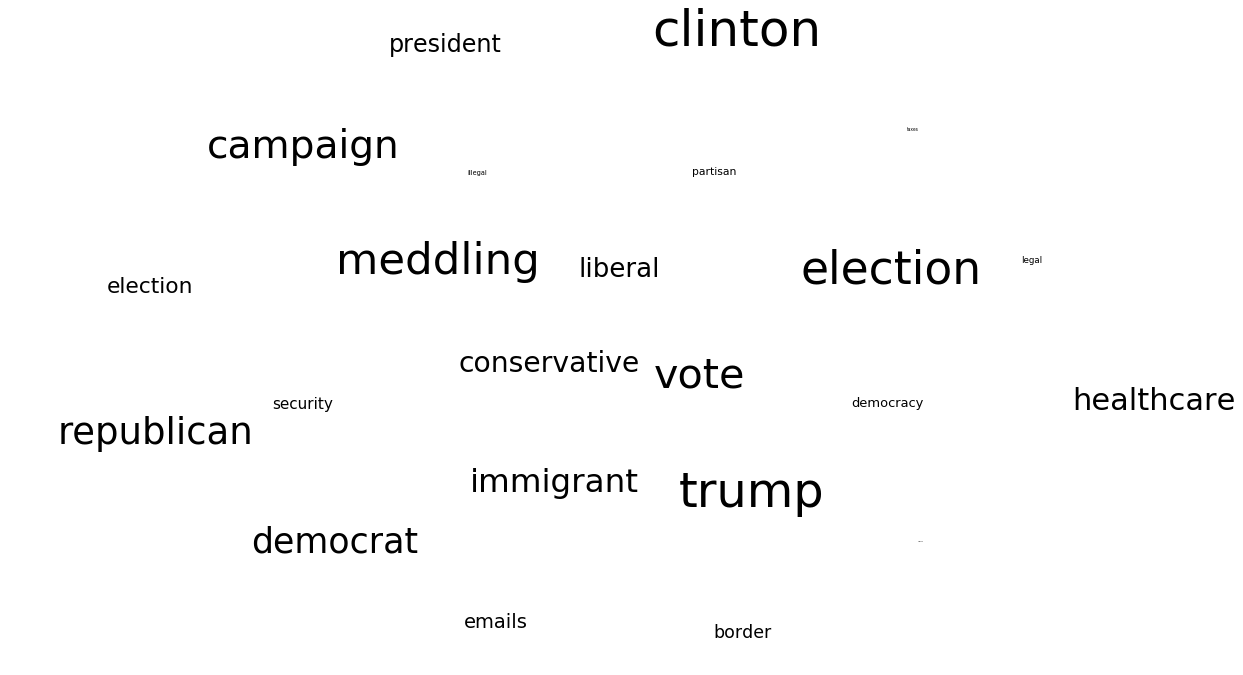

In [276]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNews[:, 0], tsneWordsNews[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(newsTargetWords):
    ax.annotate(word, (tsneWordsNews[:, 0][i],tsneWordsNews[:, 1][i]), size =  50 * (len(newsTargetWords) - i) / len(newsTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [277]:
# creating two dimensions to match the political opponents
clinton = dimension(newsW2V, ['democrat','woman','vote'], ['republican', 'man', 'meddling'])
trump = dimension(newsW2V, ['republican','conservative', 'border', 'illegal'], ['democrat','liberal','immigrant', 'legal'])
polarize = dimension(newsW2V, ['clinton','healthcare','leaks'], ['trump','guns','emails'])


In [278]:
def makeDF(model, word_list):
    c = []
    r = []
    p = []
    for word in word_list:
        c.append(sklearn.metrics.pairwise.cosine_similarity(newsW2V[word].reshape(1,-1), clinton.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(newsW2V[word].reshape(1,-1), trump.reshape(1,-1))[0][0])
        p.append(sklearn.metrics.pairwise.cosine_similarity(newsW2V[word].reshape(1,-1), polarize.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Clinton': c, 'Trump': r, 'Polarization': p}, index = word_list)
    return df

In [286]:
Politics = ['congress', 'washington', 'senate', 'legislation', 
            'elections', 'voting', 'polls', 'campaign', 'race', 
            'primary', 'debate', 'policy']

Security = ['donor','funds','emails','safety', 'dangerous', 
            'russia', 'putin', 'security', 'foreign', 'lobby', 
            "leaks", 'fake', 'syria', 'iraq', 'military', 
            'war', 'troops', 'security']

Partisanship = ['partisan','democrat', 'republican', 'healthcare',
                 'choice', 'life', 'infrastructure', 'immigration', 
                 'immigrant', 'guns', 'amendment', 'rights', 'tax', 
                 'taxes', 'border', 'mexico', 'jobs', 'economy', 
                'trade', 'conservative', 'liberal', 'moderate', 
                'progressive']



In [287]:
# getting the projections for the two candidate dimensions
Politicsdf = makeDF(newsW2V, Politics) 
Securitydf = makeDF(newsW2V, Security)
Partisandf = makeDF(newsW2V, Partisanship)

In [288]:
# plotting functions from the notebook
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

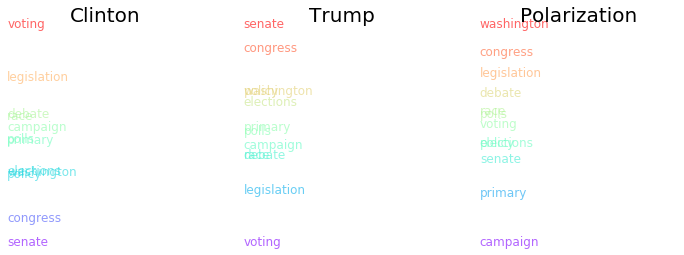

In [282]:
#Plot the occupational words in each of the three dimensions.

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Politicsdf, 'Clinton')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Politicsdf, 'Trump')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Politicsdf, 'Polarization')
plt.show()

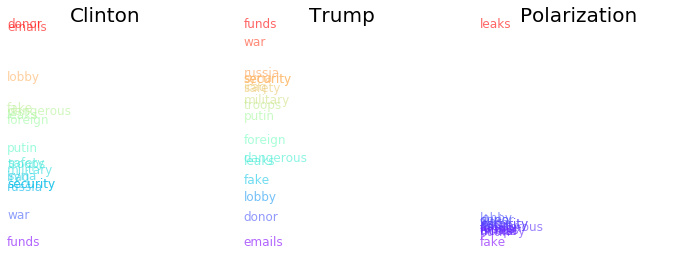

In [283]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Securitydf, 'Clinton')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Securitydf, 'Trump')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Securitydf, 'Polarization')
plt.show()

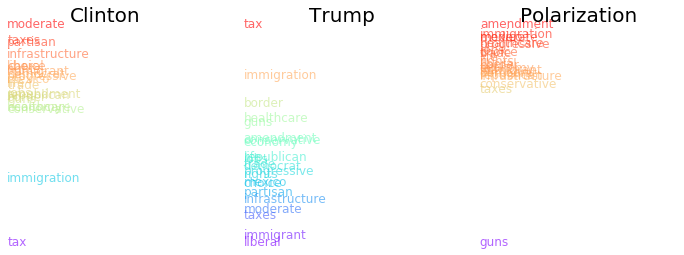

In [285]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Partisandf, 'Clinton')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Partisandf, 'Trump')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Partisandf, 'Polarization')
plt.show()

In [332]:

wildcard = ['media', 'journalist', 'press', 'elite', 'news', 'bias', 'coverage']

wildcarddf = makeDF(newsW2V, wildcard)

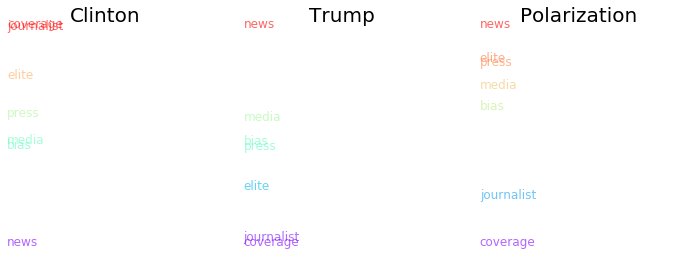

In [333]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, wildcarddf, 'Clinton')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, wildcarddf, 'Trump')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, wildcarddf, 'Polarization')
plt.show()

## <span style="color:red">*Exercise 4b*</span>

<span style="color:red">**Do only 4a or 4b.** Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space? 

In [581]:
import copy

In [582]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [ ]:
# but how is being generated? the same way for both?

In [583]:
news_df_rand = news_df.sample(n = 1000)

In [584]:
news_df_rand['tokenized_sents'] = news_df_rand['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
news_df_rand['normalized_sents'] = news_df_rand['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

In [585]:
word_count = 0
for row in news_df_rand['normalized_sents']:
    for wordlist in row:
        for item in wordlist:
            if item == 'clinton':
                word_count += 1
print(word_count)

234


In [586]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [587]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [588]:
news_df_rand['trump_filter'] = news_df_rand['text'].apply(lambda x: bool(set(x.split()).intersection(['trump'])))
copy = news_df_rand[news_df_rand['trump_filter'] == True]


pandas.core.frame.DataFrame

In [641]:
rawEmbeddings, comparedEmbeddings = compareModels(news_df_rand, 'date')

AttributeError: 'DataFrame' object has no attribute 'wv'

In [590]:
rawEmbeddings.keys()

dict_keys(['16-11-01', '16-11-02', '16-11-03', '16-11-04', '16-11-05', '16-11-06', '16-11-07', '16-11-08', '16-11-09', '16-11-10', '16-11-11', '16-11-12', '16-11-13', '16-11-14', '16-11-15', '16-11-16', '16-11-17', '16-11-18', '16-11-19', '16-11-20', '16-11-21', '16-11-22', '16-11-23', '16-11-24', '16-11-25', '16-11-26', '16-11-27', '16-11-28', '16-11-29', '16-11-30'])

In [591]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

year


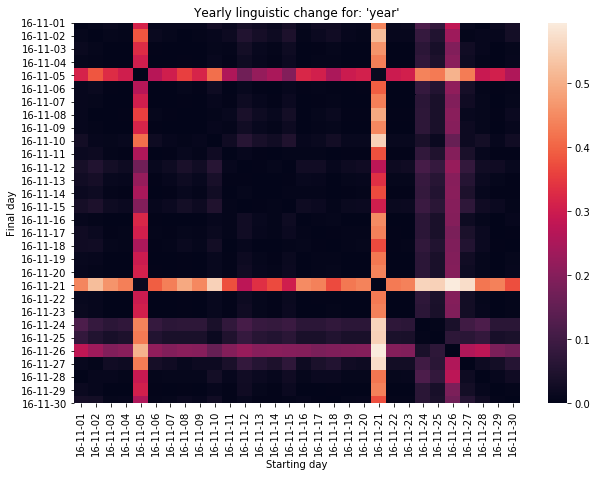

In [592]:
targetWord = 'year'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting day")
ax.set_ylabel("Final day")
ax.set_ylabel("Final day")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [606]:
copy.drop(columns=['trump_filter'])

,Unnamed: 0,title,date,country,source,url,text,tokenized_text,tokenized_sents,normalized_sents
9440,15353041,"For the Sake of the Nation, Obama Should Pardo...",16-11-12,US,Lawfare (blog),https://www.lawfareblog.com/sake-nation-obama-...,"@@15353041 <h> For the Sake of the Nation , Ob...","['<', 'h', '>', 'For', 'the', 'Sake', 'of', 't...","[[@@15353041], [<, h, >], [For, the, Sake, of,...","[[@@15353041], [<, h, >], [sake, nation, obama..."
88483,15544700,Government accused of rejecting Green pollutio...,16-11-23,IE,Irish Times,http://www.irishtimes.com/news/politics/oireac...,@@15544700 <h> Coveney to write to European Co...,"['<', 'h', '>', 'Coveney', 'to', 'write', 'to'...","[[@@15544700, <, h, >, Coveney, to, write, to,...","[[@@15544700, <, h, >, coveney, write, europea..."
14086,15445039,Lack of ground game has made Clemson one-dimen...,16-11-17,US,ESPN (blog),http://www.espn.com/blog/acc/post/_/id/96662/l...,@@15445039 <p> Deshaun Watson threw 70 passes ...,"['<', 'p', '>', 'Deshaun', 'Watson', 'threw', ...","[[@@15445039], [<, p, >, Deshaun, Watson, thre...","[[@@15445039], [<, p, >, deshaun, watson, thre..."
7365,15317258,Colin Kaepernick on not voting: Result of elec...,16-11-10,US,NBCSports.com,http://profootballtalk.nbcsports.com/2016/11/1...,@@15317258 <h> Colin Kaepernick on not voting ...,"['<', 'h', '>', 'Colin', 'Kaepernick', 'on', '...","[[@@15317258, <, h, >, Colin, Kaepernick, on, ...","[[@@15317258, <, h, >, colin, kaepernick, voti..."
71837,15168588,Jeremy Renner: 'I want five daughters',16-11-01,IE,TV3.ie,http://www.tv3.ie/xpose/article/entertainment-...,@@15168588 <h> Jeremy Renner : ' I want five d...,"['<', 'h', '>', 'Jeremy', 'Renner', 'I', 'want...","[[@@15168588], [<, h, >, Jeremy, Renner], [I, ...","[[@@15168588], [<, h, >, jeremy, renner], [wan..."
39126,15483032,ECHL vet pulls incredible between the legs mov...,16-11-19,CA,The Hockey News,http://www.thehockeynews.com/news/article/echl...,@@15483032 <h> ECHL vet pulls incredible betwe...,"['<', 'h', '>', 'ECHL', 'vet', 'pulls', 'incre...","[[@@15483032], [<, h, >, ECHL, vet, pulls, inc...","[[@@15483032], [<, h, >, echl, vet, pulls, inc..."


In [639]:
rawEmbeddings_trump, comparedEmbeddings_trump = compareModels(copy, 'date')

AttributeError: 'DataFrame' object has no attribute 'wv'

In [640]:
targetWord = 'trump'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings_trump)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting day")
ax.set_ylabel("Final day")
ax.set_ylabel("Final day")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

NameError: name 'comparedEmbeddings_trump' is not defined

In [602]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [603]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 7 words to compare


In [604]:
#Top divergence words
wordDivergences[:7]

[('h', 12.001740377396345),
 ('new', 2.5856191515922546),
 ('year', 1.6435051560401917),
 ('<', 1.1648920178413391),
 ('>', 1.1370141506195068),
 ('p', 1.0406508445739746),
 ('said', 1.0174835324287415)]